<h2 align=center> Covid-19 and World Hapiness Report EDA

__Purpose: In this notebook, I use Covid-19 case counts data from Johns Hopkins University along with the World Happiness Report to explore relationship between maximum infection rates and wealth/health/happiness indicators.__

#      
## Part 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

#           
## Part 2. Import and Explore Data - Covid19 Data

In [2]:
covid_data = pd.read_csv('covid19_Confirmed_dataset.csv')
covid_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
covid_data.shape

(266, 104)

In [4]:
covid_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

This dataset has case counts from 1/22/2020 to 4/30/2020 by countries/regions.

In [5]:
# Latitude and longitude coordinates are not important for our analysis - drop them.
covid_data.drop(['Lat','Long'], axis=1, inplace=True)
covid_data.sample(3, random_state=72)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
71,Qinghai,China,0,0,0,1,1,6,6,6,...,18,18,18,18,18,18,18,18,18,18
253,NaN,Botswana,0,0,0,0,0,0,0,0,...,20,22,22,22,22,22,22,23,23,23
132,NaN,Indonesia,0,0,0,0,0,0,0,0,...,7135,7418,7775,8211,8607,8882,9096,9511,9771,10118


In [6]:
region = covid_data['Country/Region'].nunique()
print(f'Unique number of Country/Regions in this dataset:',region)

Unique number of Country/Regions in this dataset: 187


There are 266 rows but there are only 187 unique country/regions; there can be more than one record for some countries.
Let's aggregate the data so that the data is unique by country.

#### Aggregate the rows by the country

In [7]:
# Sum all the case counts by country
covid_agg = covid_data.groupby("Country/Region").sum()

In [8]:
covid_agg.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


In [9]:
covid_agg.shape

(187, 100)

Now the rowcount matches the number of unique country/regions in data. Data is now unique by coutry.

#        
## Part 3. Visualize Counts of Covid-19 Cases

#### Let's look at the case counts by country.

/Users/jil380/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


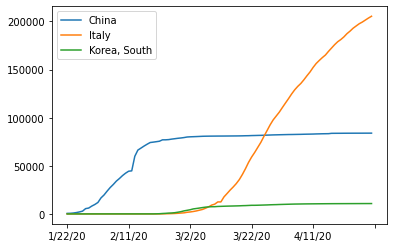

In [10]:
# Use three examples as an example
covid_agg.loc['China'].plot()
covid_agg.loc['Italy'].plot()
covid_agg.loc['Korea, South'].plot()
plt.legend()

####  Get the first derivative of the curve

/Users/jil380/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

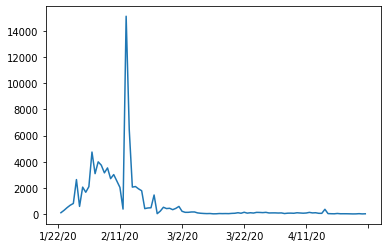

In [11]:
# Get differences for each day
covid_agg.loc['China'].diff().plot()

In [12]:
# Find maxmimum infection rate for China and Korea, for an example.
covid_agg.loc['China'].diff().max()
covid_agg.loc['Korea, South'].diff().max()

851.0

#### Find maximum infection rate for all of the countries.

In [13]:
# Get all the countries
countries = list(covid_agg.index)

max_infection_rates = []
for country in countries :
    max_infection_rates.append(covid_agg.loc[country].diff().max())

# Add the column in our covid data
covid_agg['max infection rate'] = max_infection_rates

In [14]:
covid_agg.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0


#### Get maximum infection rate for each country only

In [15]:
covid_max_rate = pd.DataFrame(covid_agg['max infection rate'])

In [16]:
covid_max_rate.head(3)

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0


#    
## Part 4. Importing the world happiness report

In [17]:
happy = pd.read_csv("worldwide_happiness_report.csv")
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
happy.shape

(156, 9)

In [19]:
happy.iloc[:,1].nunique()

156

The number of unique country matches the row counts - this data is unique by country.

#### Drop features that we are not interested in

In [20]:
# We want country, GDP, social support, life expentancy, life freedom - drop all others
columns_drop= ['Overall rank','Score','Generosity','Perceptions of corruption']
happy.drop(columns_drop,axis=1 , inplace=True)

In [21]:
happy.head(3)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603


#### Change indices of data to merge with covid-19 data

In [22]:
happy.set_index(['Country or region'],inplace=True)
happy.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603


#### Joining world hapiness report data with covid19 data

In [23]:
data = happy.join(covid_max_rate,how="inner")
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


#### Create correlation matrix 

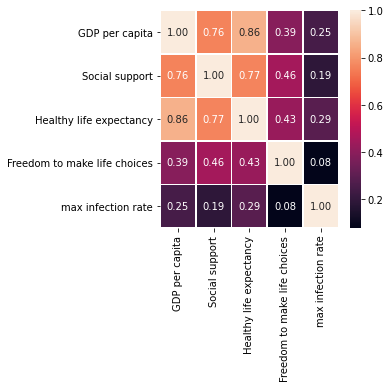

In [24]:
# Plot correlation heat map
f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax);

Healthy life expentancy seems to be highly correlated with GDP per capita.

#### Look at the max infection rate more in depth

In [25]:
data['max infection rate'].describe()

count      143.000000
mean      1089.944056
std       3120.702758
min          1.000000
25%         31.000000
50%        107.000000
75%        530.500000
max      26849.000000
Name: max infection rate, dtype: float64

Looking at the summary of the 'max infection rate' it seems to be highly right-skewed since mean is 1089 but the median and the 75 percentile are much less than the mean. 

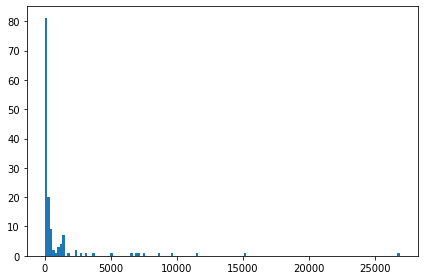

In [26]:
plt.figure(figsize=(6,4)) 
plt.hist(data['max infection rate'], bins = 'auto')
plt.tight_layout()

Is it indeed very right-skewed. So we will take a log of the max infection rate.

(array([ 4.,  7., 18., 23., 25., 28., 12., 15.,  8.,  3.]),
 array([ 0.        ,  1.01979839,  2.03959677,  3.05939516,  4.07919354,
         5.09899193,  6.11879031,  7.1385887 ,  8.15838708,  9.17818547,
        10.19798386]),
 <BarContainer object of 10 artists>)

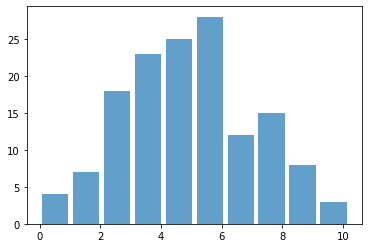

In [27]:
# Let's plot it again after taking log.
plt.hist(x=np.log(data['max infection rate']), bins='auto', alpha=0.7, rwidth=0.85)

Now it looks more normally distributed.

#      
## Part 5. Visualize results

### Plotting GDP vs. Maximum Infection Rate

<AxesSubplot:xlabel='GDP per capita', ylabel='max infection rate'>

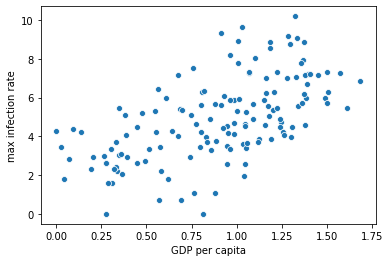

In [28]:
x = data['GDP per capita']
y = data['max infection rate']
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='max infection rate'>

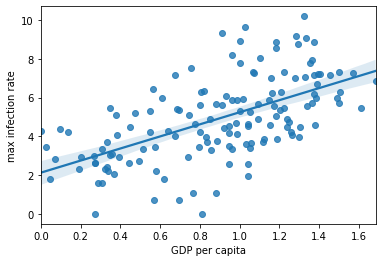

In [29]:
# Let's add the regression lines
sns.regplot(x,np.log(y))

This shows positive corrleation between the max infection rate and the GDP per capita. It shows that countries with higher GDP per capita has higher maximum infection rate. This is an interesting pattern since one might assume that wealtheir countries would provide a better responses to pandemic.
We are going to explore the relationship oof maximum infection rate with othe r

#### Plotting Healthy Life Expectancy vs. Maximum Infection Rate

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max infection rate'>

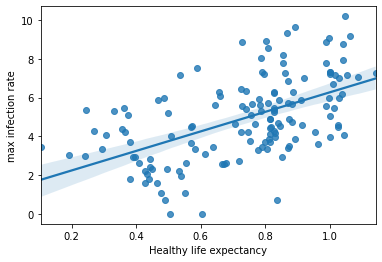

In [30]:
x = data['Healthy life expectancy']
y = data['max infection rate']
sns.regplot(x,np.log(y))

#### Plotting Social support vs. Maximum Infection Rate

<AxesSubplot:xlabel='Social support', ylabel='max infection rate'>

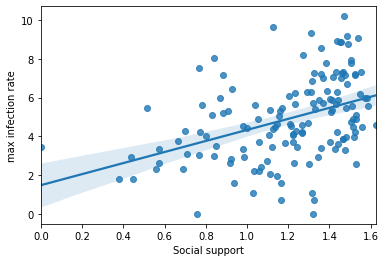

In [31]:
x = data['Social support']
y = data['max infection rate']
sns.regplot(x,np.log(y))

#### Plotting Freedom to Make Life Choices vs. Maximum Infection Rate

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max infection rate'>

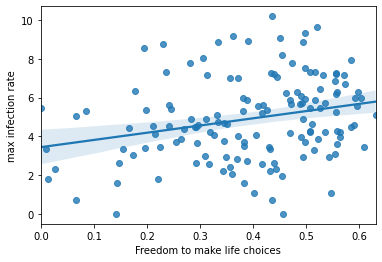

In [32]:
x = data['Freedom to make life choices']
y = data['max infection rate']
sns.regplot(x,np.log(y))

#      
## Conclusion 

Plotting Maximum Infection Rate against different variables in the World Happiness Report shows interesting pattern. In contrast to one's assumption that wealthier countries would respond better to pandemic, we see that countries with higher GDP and life expentancy have higher maximum infection rates. 
The covid19 dataset only accounts for the case counts between 1/22/2020 - 4/30/2020, which is considered the early periods of pandemic. Given that many countires had trouble getting covid testing tools on time in early period, high maximum infection rates could mean more testings being done in those countries. 

To further this analysis, it would be great to incorporate country population in order to adjust the covid case counts by the countries' population. Currently, the max infection rate is daily differences of cases so it is more likely that bigger countries will record higher infection cases.